In [5]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [6]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [7]:
df = pd.read_csv(csv_path)
df


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [8]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


<Axes: xlabel='Date Time'>

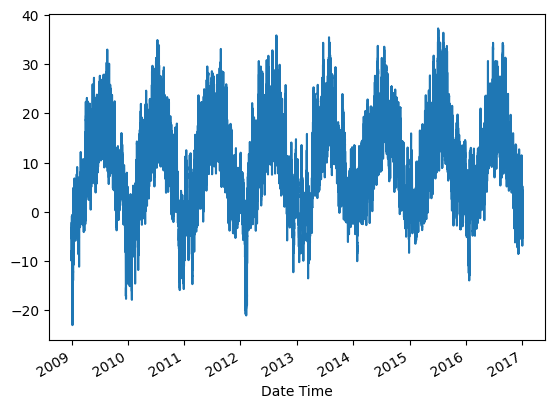

In [9]:
temp = df['T (degC)']
temp.plot()

In [17]:
df_np = temp.to_numpy()

In [18]:
def df_X_y(df, window_size=10):
    X = []
    y = []
    for i in range(len(df) - window_size):
        row = [[value] for value in df[i:i+window_size]]
        X.append(row)
        label = df[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [19]:
WINDOW_SIZE = 10
X, y = df_X_y(df_np, WINDOW_SIZE)

In [20]:
X.shape , y.shape

((420541, 10, 1), (420541,))

In [23]:
train_index = int(len(X) * 0.75)
val_index = int(len(X) * 0.90)


X_train, y_train = X[:train_index], y[:train_index]
X_val, y_val = X[train_index:val_index], y[train_index:val_index]
X_test, y_test = X[val_index:], y[val_index:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((315405, 10, 1),
 (315405,),
 (63081, 10, 1),
 (63081,),
 (42055, 10, 1),
 (42055,))

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(64))
model1.add(Dense(32, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [33]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[cp1])

Epoch 1/5
9857/9857 [==============================] - 83s 8ms/step - loss: 0.0459 - root_mean_squared_error: 0.2141 - val_loss: 0.0692 - val_root_mean_squared_error: 0.2631
Epoch 2/5
9857/9857 [==============================] - 81s 8ms/step - loss: 0.0454 - root_mean_squared_error: 0.2130 - val_loss: 0.0475 - val_root_mean_squared_error: 0.2180
Epoch 3/5
9855/9857 [============================>.] - ETA: 0s - loss: 0.0450 - root_mean_squared_error: 0.2121

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


9857/9857 [==============================] - 87s 9ms/step - loss: 0.0450 - root_mean_squared_error: 0.2121 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2063
Epoch 4/5
9857/9857 [==============================] - 82s 8ms/step - loss: 0.0445 - root_mean_squared_error: 0.2109 - val_loss: 0.0427 - val_root_mean_squared_error: 0.2066
Epoch 5/5
9852/9857 [============================>.] - ETA: 0s - loss: 0.0443 - root_mean_squared_error: 0.2104

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


9857/9857 [==============================] - 88s 9ms/step - loss: 0.0443 - root_mean_squared_error: 0.2104 - val_loss: 0.0412 - val_root_mean_squared_error: 0.2031


In [34]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [35]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

9857/9857 [==============================] - 34s 3ms/step


,Train Predictions,Actuals
0,-8.547291,-8.76
1,-8.866312,-8.88
2,-8.980054,-8.85
3,-8.918967,-8.83
4,-8.894457,-8.66
...,...,...
315400,-2.912903,-3.13
315401,-3.196986,-3.26
315402,-3.288624,-3.32
315403,-3.341194,-3.33


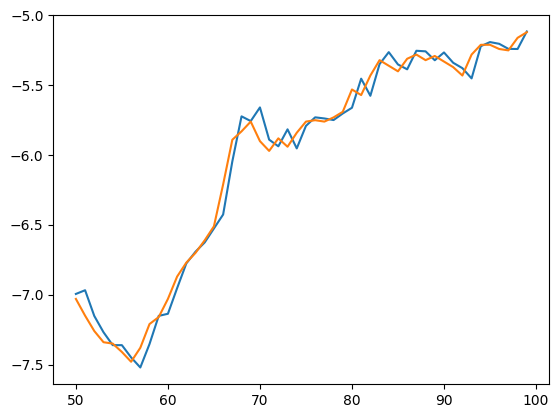

In [36]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [37]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

1972/1972 [==============================] - 7s 3ms/step


,Val Predictions,Actuals
0,-3.314915,-3.10
1,-3.027030,-3.28
2,-3.375739,-3.48
3,-3.539853,-3.58
4,-3.620975,-3.69
...,...,...
63076,2.819213,2.80
63077,2.782055,2.84
63078,2.861979,2.86
63079,2.855633,2.81


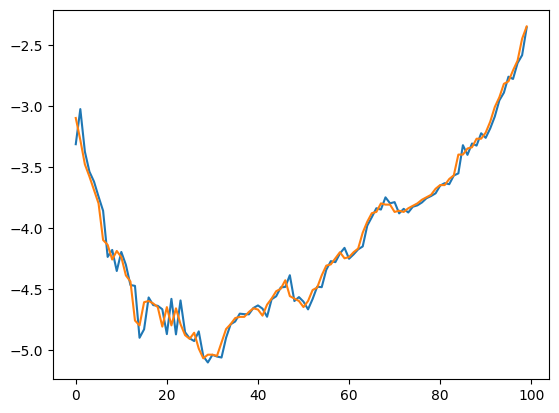

In [38]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [39]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1315/1315 [==============================] - 5s 4ms/step


,Test Predictions,Actuals
0,2.797397,2.80
1,2.788797,2.75
2,2.710944,2.73
3,2.714693,2.67
4,2.620049,2.62
...,...,...
42050,-4.079510,-4.05
42051,-4.114017,-3.35
42052,-3.063730,-3.16
42053,-3.143334,-4.23


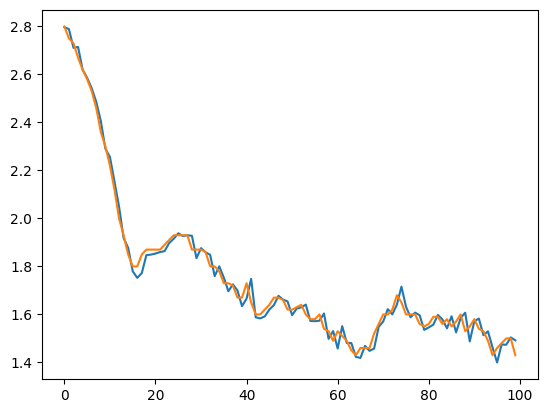

In [40]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])